In [1]:

import pandas as pd
from sklearn import preprocessing

f_train = 'd:/broadband_train.csv'
f_test = 'd:/broadband_test.csv'

#读训练数据
df = pd.read_csv(f_train, encoding='gb2312')
#空值填0
df = df.fillna(0)
df['GENDER'] = df['GENDER'].replace('男', 1).replace('女', 0)
df['AUTOPAY'] = df['AUTOPAY'].replace('是', 1).replace('否', 0)


#剔除cust_id列，其他作为训练数据X，最后一列是目标值y
X_train = df.iloc[:,1:12]
y_train = df.iloc[:,12]

#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)

In [19]:
df.head()

,CUST_ID,GENDER,AGE,TENURE,CHANNEL,AUTOPAY,ARPB_3M,CALL_PARTY_CNT,DAY_MOU,AFTERNOON_MOU,NIGHT_MOU,AVG_CALL_LENGTH,BROADBAND
0,63,1,34,27,2,0,203.0,0.0,0.0,0.0,0.0,3.04,1
1,64,0,62,58,1,0,360.0,0.0,0.0,1910.0,0.0,3.30,1
2,65,1,39,55,3,0,304.0,0.0,437.2,200.3,0.0,4.92,0
3,66,0,39,55,3,0,304.0,0.0,437.2,182.8,0.0,4.92,0
4,67,1,39,55,3,0,0.0,0.0,0.0,214.5,0.0,4.92,0


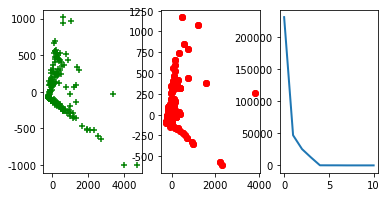

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
plt.plot(pca.explained_variance_, linewidth=2)
plt.show()

In [5]:
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
import numpy as np

#plt.scatter(pca.transform(X_train)[:,0],pca.transform(X_train)[:,1])
pca = PCA(n_components=2)
pca.fit(X_train)
x1 = pca.transform(X_train)[:,0]
x2 = pca.transform(X_train)[:,1]
df = pd.DataFrame({'x1':x1,
             'x2':x2,
             'y':y_train})


plt.figure(1, figsize=(6, 3))

plt.subplot(131)
plt.scatter(df[df.y==1].x1,df[df.y==1].x2,c='g',marker='+')
#plt.axis([0,5000,-1000,1250])

plt.subplot(132)
plt.scatter(df[df.y==0].x1,df[df.y==0].x2,c='r',marker='o')
#plt.axis([0,5000,-1000,1250])


plt.subplot(133)
h = .02  # step size in the mesh

clf = linear_model.LogisticRegression(C=1e5)
# we create an instance of Neighbours Classifier and fit the data.
clf.fit(pca.transform(X_train), y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x1.min() - .5, x1.max() + .5
y_min, y_max = x2.min() - .5, x2.max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


plt.scatter(df[df.y==0].x1,df[df.y==0].x2,c='r',marker='o')
plt.scatter(df[df.y==1].x1,df[df.y==1].x2,c='g',marker='+')

#plt.axis([0,5000,-1000,1250])

plt.show()


MemoryError: 

In [6]:
from sklearn.feature_selection import SelectKBest,chi2

X_new = SelectKBest(chi2, k=2).fit_transform(X_train,y_train)

In [9]:
X_new

array([[    0. ,     0. ],
       [    0. ,  1910. ],
       [  437.2,   200.3],
       ..., 
       [    0. ,     0. ],
       [    0. ,     0. ],
       [    0. ,     0. ]])

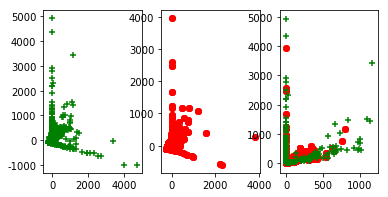

In [7]:
df = pd.DataFrame({'x1':X_new[:,0],
             'x2':X_new[:,1],
             'y':y_train})


plt.figure(1, figsize=(6, 3))

plt.subplot(131)
plt.scatter(df[df.y==1].x1,df[df.y==1].x2,c='g',marker='+')
#plt.axis([0,5000,-1000,1250])

plt.subplot(132)
plt.scatter(df[df.y==0].x1,df[df.y==0].x2,c='r',marker='o')
#plt.axis([0,5000,-1000,1250])

plt.subplot(133)
plt.scatter(df[df.y==0].x1,df[df.y==0].x2,c='r',marker='o')
plt.scatter(df[df.y==1].x1,df[df.y==1].x2,c='g',marker='+')

#plt.axis([0,5000,-1000,1250])

plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
scores = cross_val_score(model, X_train, y_train, cv=10)